# Final Project - Sheila Amalia Burhanudin (Group B)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [20]:
plt.style.use('seaborn')

# I. Load Datasets

In [21]:
data = pd.read_csv('forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [23]:
print('Total data:', data.shape[0])
print('Total features:', data.shape[1])

Total data: 517
Total features: 13


# II. Data Exploratory Analysis 

In [24]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [25]:
# Descript data per features
list_item = []
for col in data.columns:
    list_item.append([col, data[col].dtype, data[col].isna().sum(), 100*data[col].isna().sum()/len(data[col]), data[col].nunique(), data[col].unique()[:4]])
desc_df = pd.DataFrame(data=list_item, columns='fitur tipe_data jumlah_null %_null jumlah_unique unique_sample'.split())
desc_df

,fitur,tipe_data,jumlah_null,%_null,jumlah_unique,unique_sample
0,X,int64,0,0.0,9,"[7, 8, 6, 5]"
1,Y,int64,0,0.0,7,"[5, 4, 6, 3]"
2,month,object,0,0.0,12,"[mar, oct, aug, sep]"
3,day,object,0,0.0,7,"[fri, tue, sat, sun]"
4,FFMC,float64,0,0.0,106,"[86.2, 90.6, 91.7, 89.3]"
5,DMC,float64,0,0.0,215,"[26.2, 35.4, 43.7, 33.3]"
6,DC,float64,0,0.0,219,"[94.3, 669.1, 686.9, 77.5]"
7,ISI,float64,0,0.0,119,"[5.1, 6.7, 9.0, 9.6]"
8,temp,float64,0,0.0,192,"[8.2, 18.0, 14.6, 8.3]"
9,RH,int64,0,0.0,75,"[51, 33, 97, 99]"


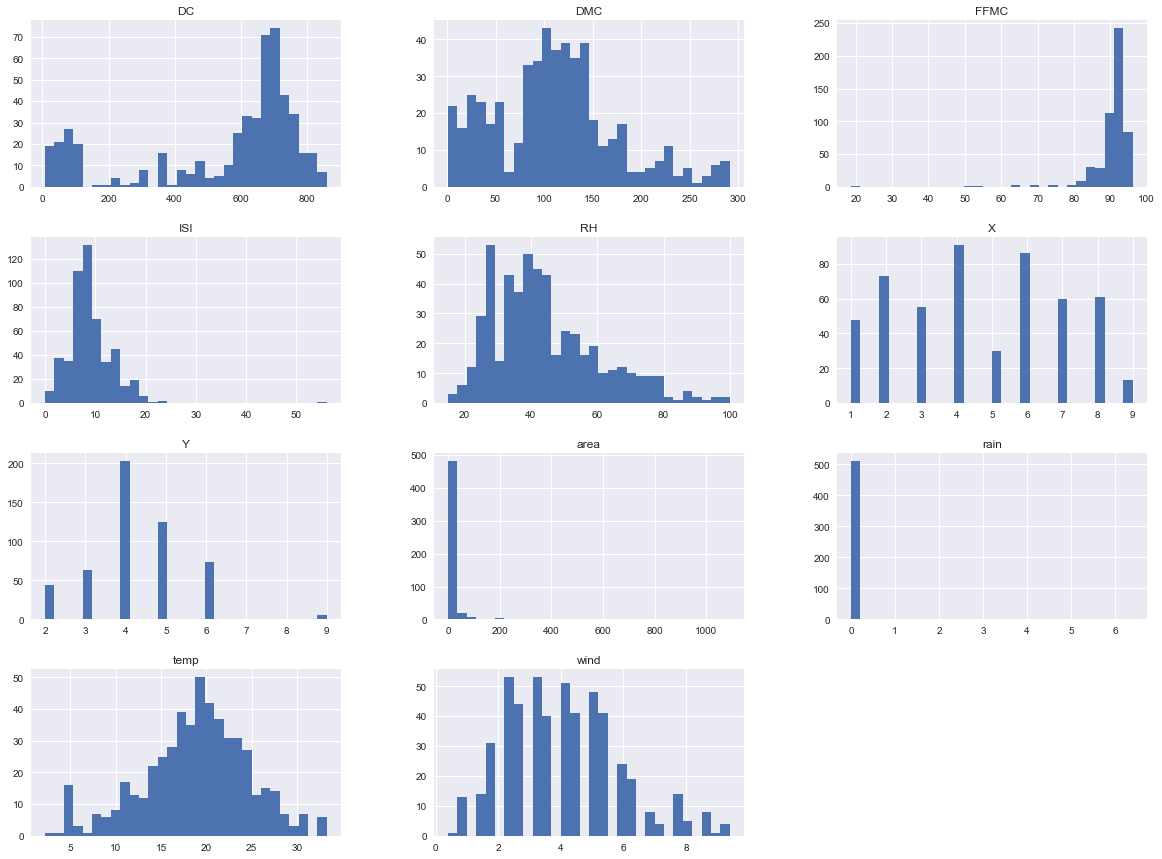

In [26]:
data.hist(bins=30, figsize=(20,15)) # plotting the histogram
plt.show()

Dari distribusi data numerik terlihat variabel dengan distribusi skew yakni FMCC, rain, dan area.

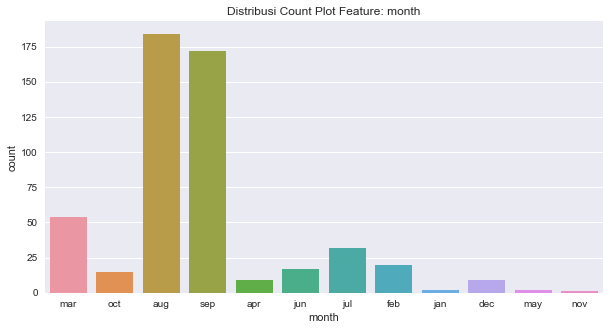

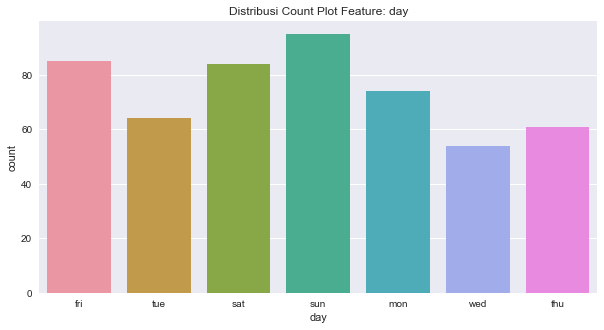

In [27]:
cat = [i for i in data.select_dtypes(include='object')]
for i in cat:
    plt.figure(figsize=(10,5))
    sns.countplot(data[i], data = data)
    plt.title('Distribusi Count Plot Feature: '+str(i))
    plt.show()

Plotting correlation:


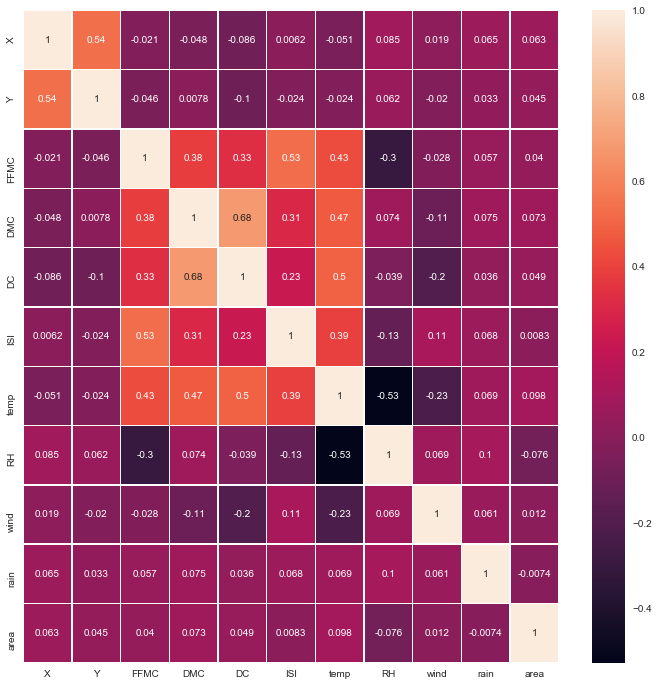

In [28]:
f,ax = plt.subplots(figsize=(12, 12))
print("Plotting correlation:")
sns.heatmap(data.corr(),annot= True, linewidths=.4)

# III. Pre-processing

## 1. One Hot Encoding fitur month dan day

In [29]:
data = pd.get_dummies(data, columns = ['month','day'], drop_first=True)
data.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,1,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,1,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,0,1,0,0,0


## 2. Membagi klasifikasi area menjadi empat kelas

In [30]:
def area_category(x):
    if x['area'] == 0.0:
        dist_category = 0
    elif x['area'] > 0 and x['area'] <= 3.1:
        dist_category = 1
    elif x['area'] > 3.1 and x['area'] <= 10.5:
        dist_category = 2
    else:
        dist_category = 3
    return dist_category
data['area_category'] = data.apply(lambda x: area_category(x), axis = 1)
data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,area_category
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,1,0,0,0,0,0,1,0,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,1,0,0,1,0,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,1,0,0,0,2
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,1,0,0,0,3
514,7,4,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,1,0,0,0,3
515,1,4,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,1,0,0,0,0,0


In [31]:
data['area_category'].value_counts()

0    247
1     91
3     90
2     89
Name: area_category, dtype: int64

# 4. Split Datasets

In [32]:
features = data.drop(columns=['area','area_category'])
labels = data['area_category']
labels = to_categorical(labels)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 5. Eksperimen terhadap parameter

## 1. Batch Size Experiment

In [50]:
# fit a model and plot learning curve
def fit_model(X_train, y_train, X_test, y_test, n_batch):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model (epoch = 200)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0, batch_size=n_batch)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('batch='+str(n_batch))
    plt.ylim([0.0, 0.6])
    plt.legend()

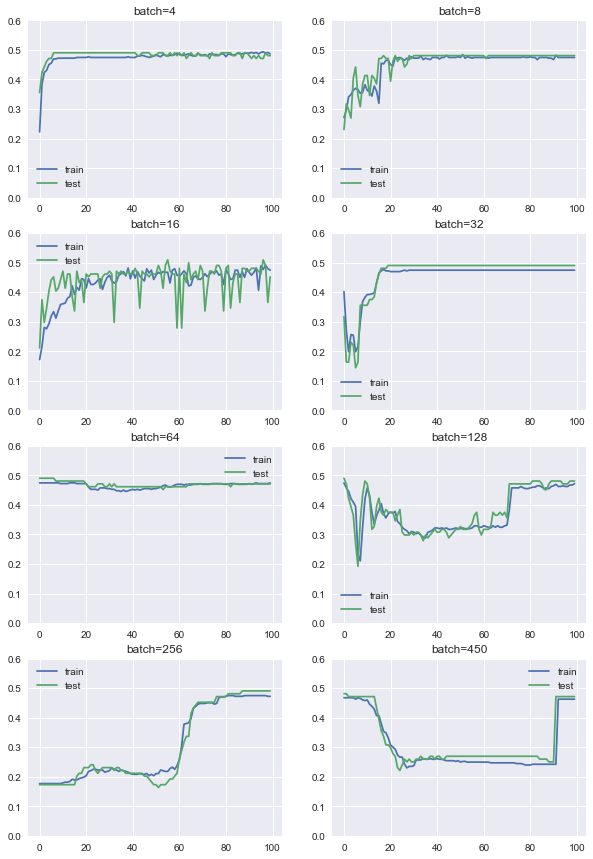

<Figure size 576x396 with 0 Axes>

In [51]:
# create learning curves for different batch sizes
batch_sizes = [4, 8, 16, 32, 64, 128, 256, 450]

plt.figure(figsize=(10, 15))
for i in range(len(batch_sizes)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a batch size
    fit_model(X_train, y_train, X_test, y_test, batch_sizes[i])

# show learning curves
plt.show()
plt.savefig('batchsize.png', tight_box=True)

Hasil eksperimen Batch size:
Batch size terbaik: 4 (epoch 100)
Opt = adam

Alasan: 
- Performa learning curve lebih stabil
- Learning rate nya lebih cepat
- Perbedaan akurasi dataset train & test tidak berbeda jauh


## 2. Epoch Experiment

In [31]:
# fit a model and plot learning curve
def model_epochs(X_train, y_train, X_test, y_test, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=32)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

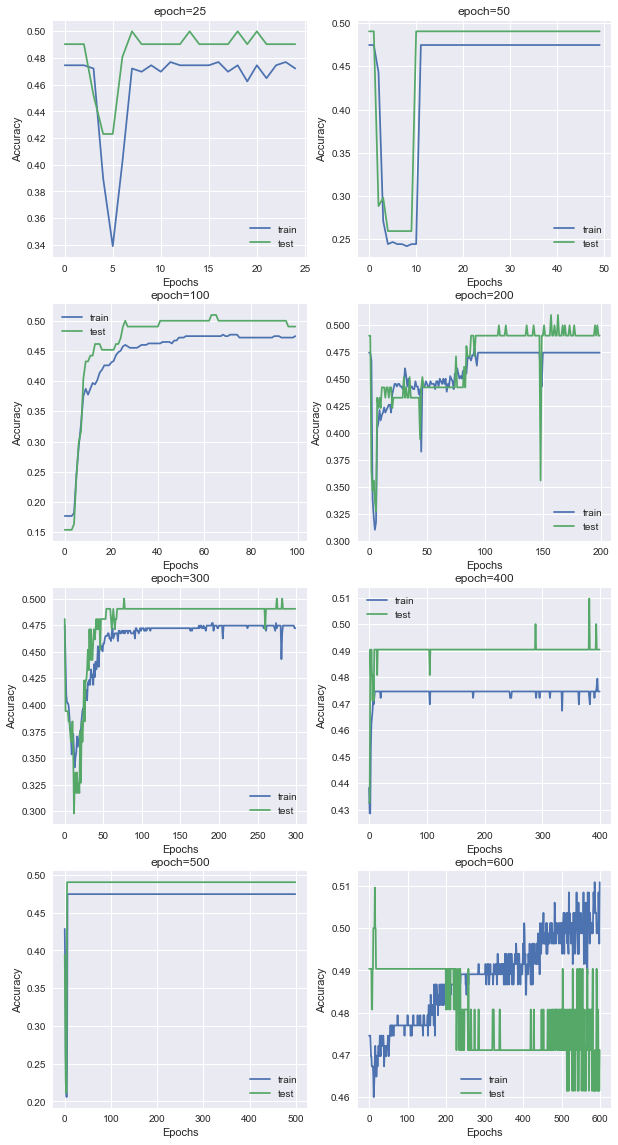

<Figure size 576x396 with 0 Axes>

In [32]:
# create learning curves for different epochs
epochs = [25, 50, 100, 200, 300, 400, 500, 600]

plt.figure(figsize=(10, 20))
for i in range(len(epochs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a epoch
    model_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()
plt.savefig('epochs.png', tight_box=True)

## a. Batch Gradient Descent (Batch size = X train)

In [33]:
# fit a model and plot learning curve
def model_epochs(X_train, y_train, X_test, y_test, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='sigmoid'))

    # compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=len(X_train))
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

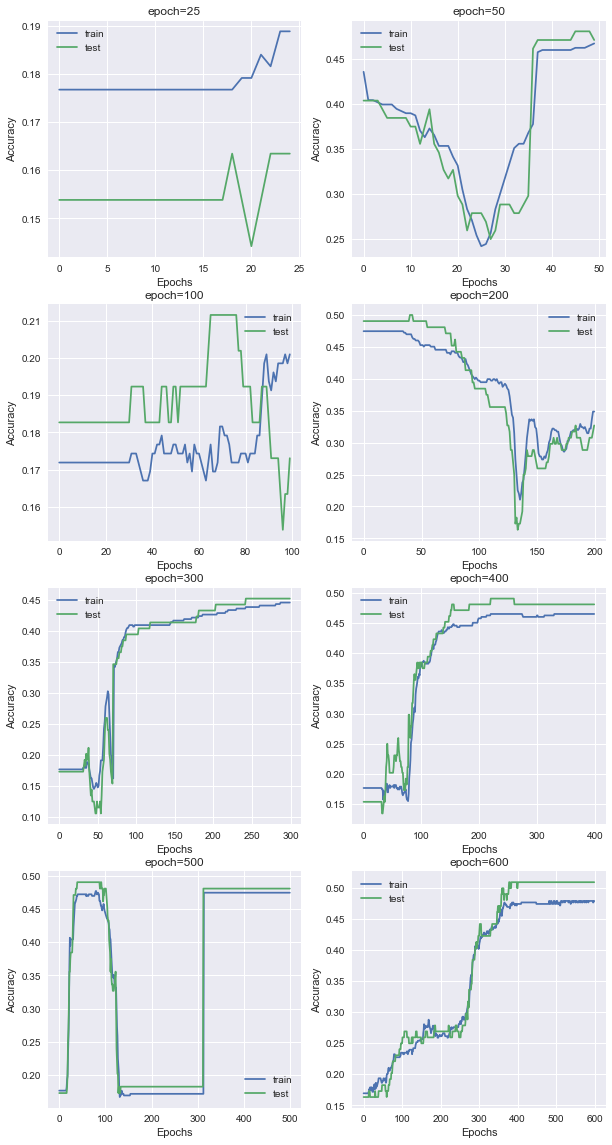

<Figure size 576x396 with 0 Axes>

In [34]:
# create learning curves for different epochs
epochs = [25, 50, 100, 200, 300, 400, 500, 600]

plt.figure(figsize=(10, 20))
for i in range(len(epochs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a epoch
    model_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()
plt.savefig('batchgradient.png', tight_box=True)

## b. Stochastic Gradient Descent (Batch size = 1)

In [38]:
# fit a model and plot learning curve
def model_epochs(X_train, y_train, X_test, y_test, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 1)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=1)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

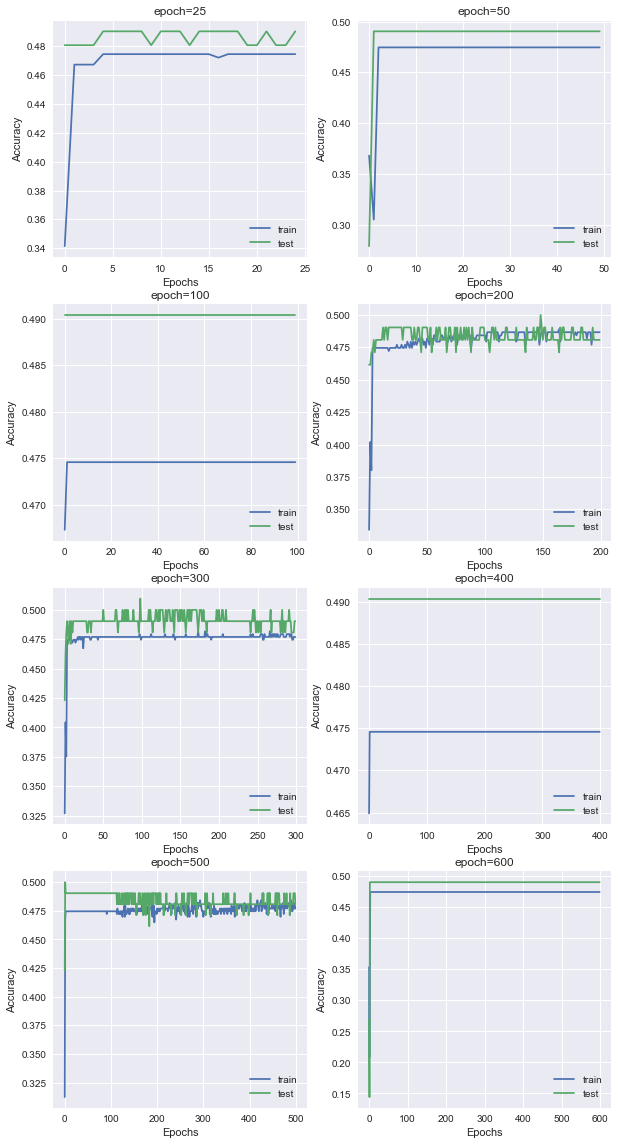

<Figure size 576x396 with 0 Axes>

In [39]:
# create learning curves for different epochs
epochs = [25, 50, 100, 200, 300, 400, 500, 600]

plt.figure(figsize=(10, 20))
for i in range(len(epochs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a epoch
    model_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()
plt.savefig('stochastic.png', tight_box=True)

Hasil perbandingan Batch Gradient Descent VS Stochastic Gradient Descent:
<br>Performa accuracy di epoch 100 dengan Batch Gradient Descent (batch size =  len(X_train) terlihat volatile/tidak stabil, sedangkan stochastic (batch size = 1 ) akurasi train dan test terlihat overfitting.

In [52]:
#batch size 4
# fit a model and plot learning curve
def model_epochs(X_train, y_train, X_test, y_test, n_epoch):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=n_epoch, verbose=0, batch_size=4)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('epoch='+str(n_epoch))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

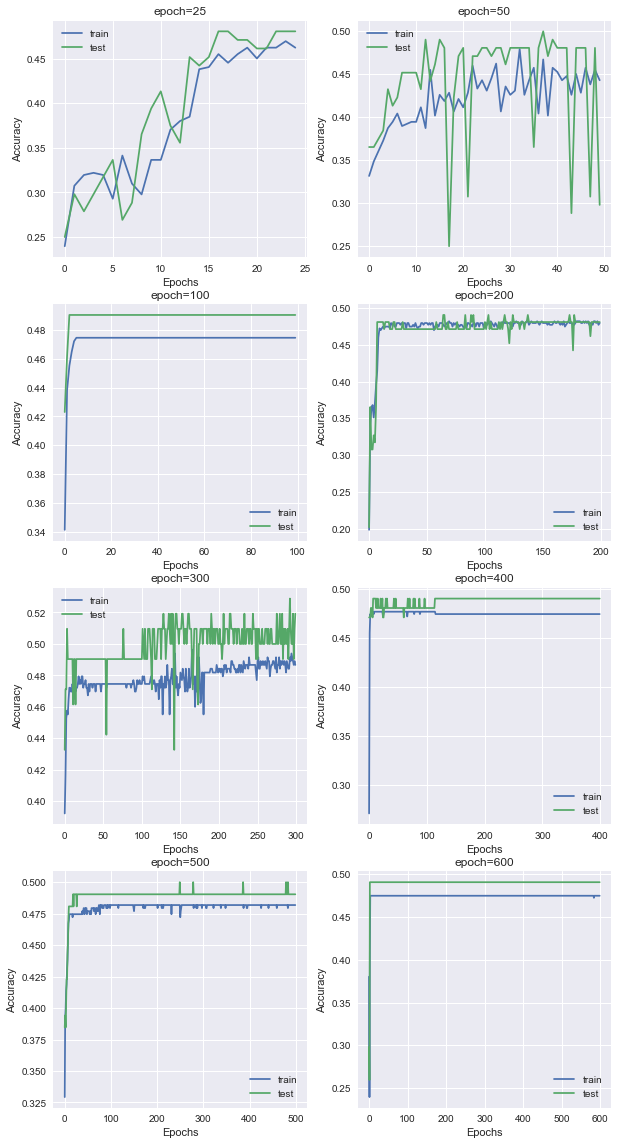

<Figure size 576x396 with 0 Axes>

In [53]:
# create learning curves for different epochs
epochs = [25, 50, 100, 200, 300, 400, 500, 600]

plt.figure(figsize=(10, 20))
for i in range(len(epochs)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a epoch
    model_epochs(X_train, y_train, X_test, y_test, epochs[i])

# show learning curves
plt.show()
plt.savefig('epochs2.png', tight_box=True)

Hasil Eksperimen Epoch: Epoch terbaik dengan batch size 4 adalah <b>epoch 200</b>
<br>Alasan:
- Performa lebih stabil
- Perbedaan akurasi dataset train & test tidak berbeda jauh

## 3. Learning Rate Experiment

In [46]:
# fit a model and plot learning curve
def model_lrate(X_train, y_train, X_test, y_test, lrate):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0, batch_size=16)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning rate='+str(lrate))
    plt.xlabel('Learning rate')
    plt.ylabel('Accuracy')
    plt.legend()

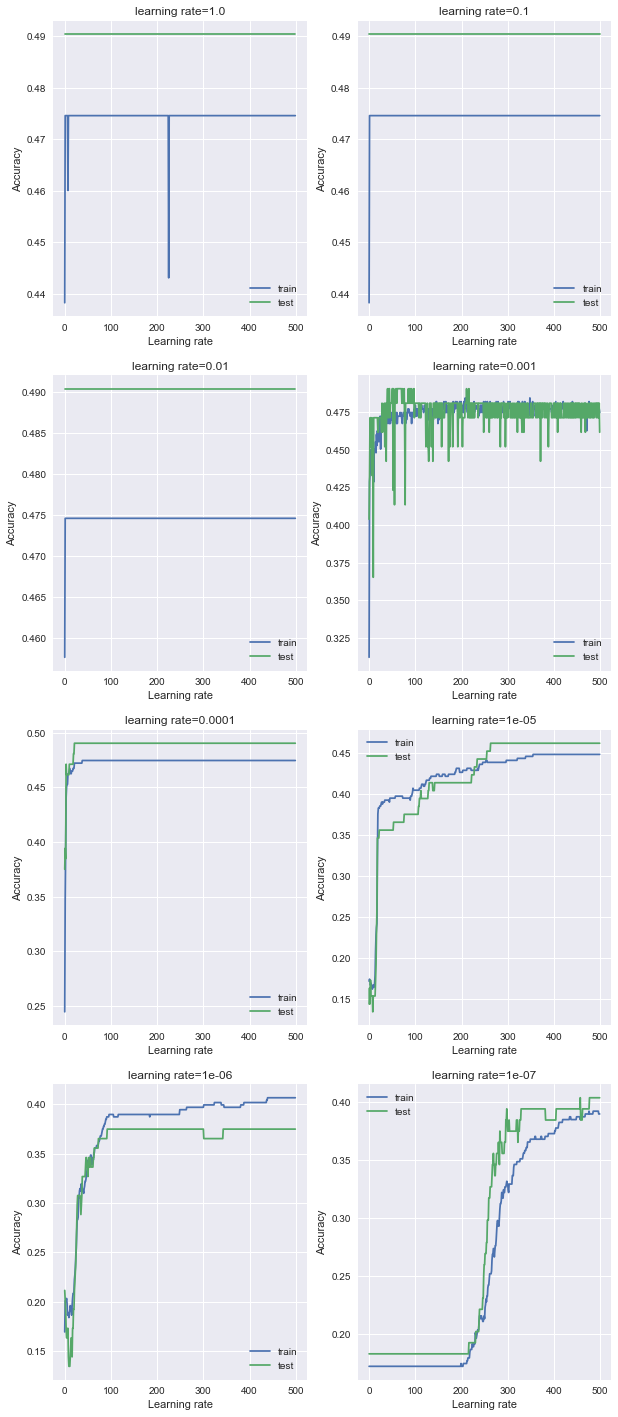

In [47]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

plt.figure(figsize=(10, 25))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    model_lrate(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

In [54]:
# fit a model and plot learning curve
def model_lrate(X_train, y_train, X_test, y_test, lrate):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0, batch_size=4)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning rate='+str(lrate))
    plt.xlabel('Learning rate')
    plt.ylabel('Accuracy')
    plt.legend()

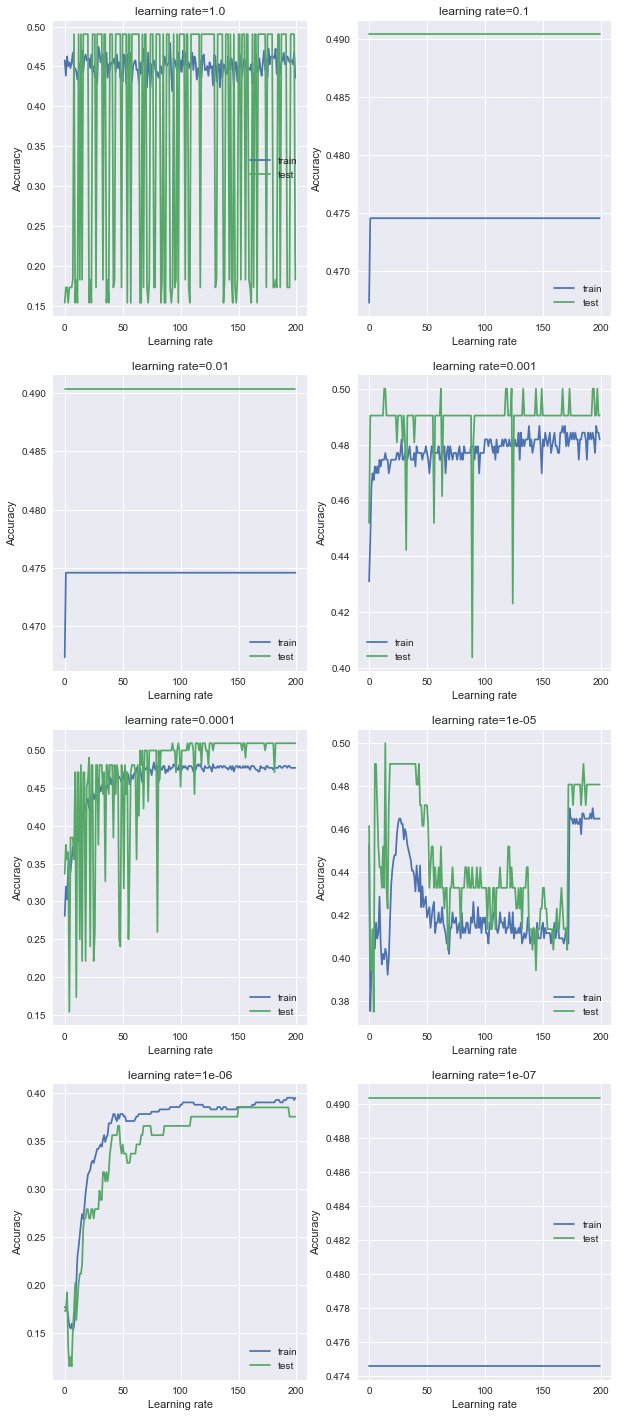

In [55]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

plt.figure(figsize=(10, 25))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    model_lrate(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

In [65]:
# fit a model and plot learning curve
def model_lrate(X_train, y_train, X_test, y_test, lrate):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    opt = SGD(lr=lrate)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=0, batch_size=32)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('learning rate='+str(lrate))
    plt.xlabel('Learning rate')
    plt.ylabel('Accuracy')
    plt.legend()

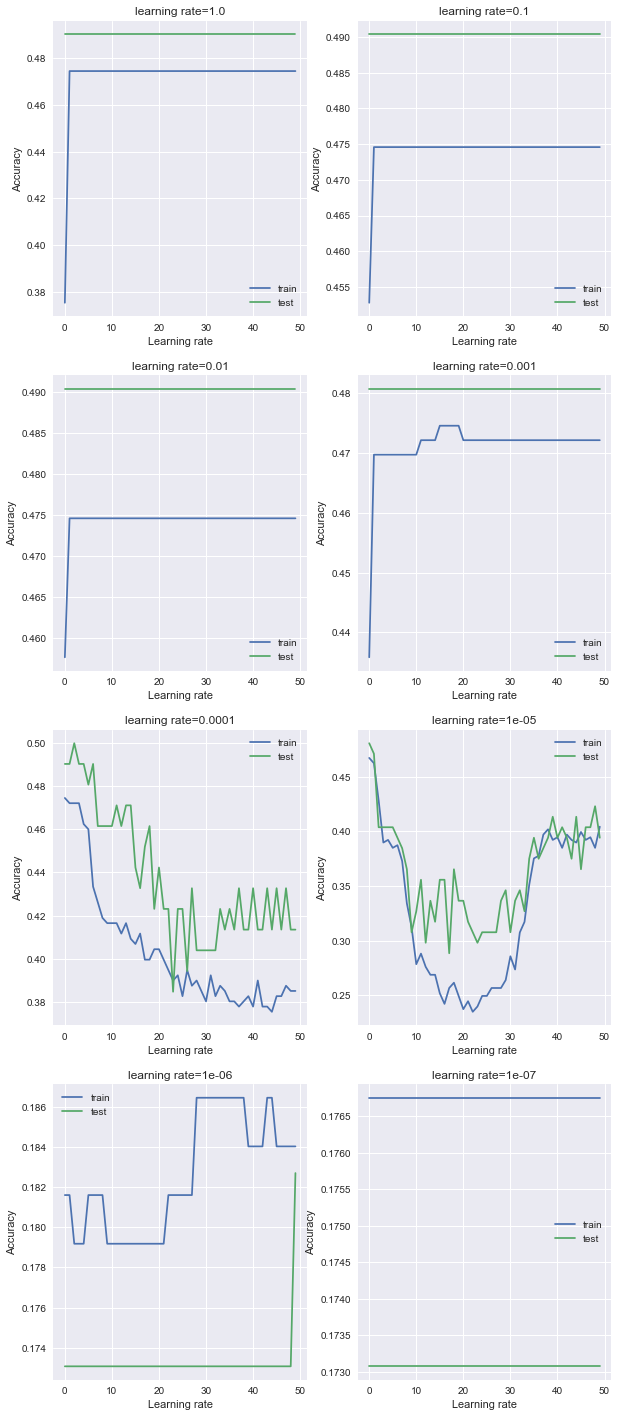

In [66]:
# create learning curves for different learning rates
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7] # use learning rate values between 0.0 to 1.0

plt.figure(figsize=(10, 25))
for i in range(len(learning_rates)):
    
    # determine the plot number
    plot_no = 420 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    model_lrate(X_train, y_train, X_test, y_test, learning_rates[i])

# show learning curves
plt.show()

Hasil eksperimen Learning Rate: Learning rate terbaik adalah <b>0.001</b>

## 4. Momentum Experiment

In [44]:
# fit a model and plot learning curve
def fit_model_with_momentum(X_train, y_train, X_test, y_test, momentum):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    opt = SGD(lr=0.001, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0, batch_size=25)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.xlabel('Momentum')
    plt.ylabel('Accuracy')
    plt.legend()

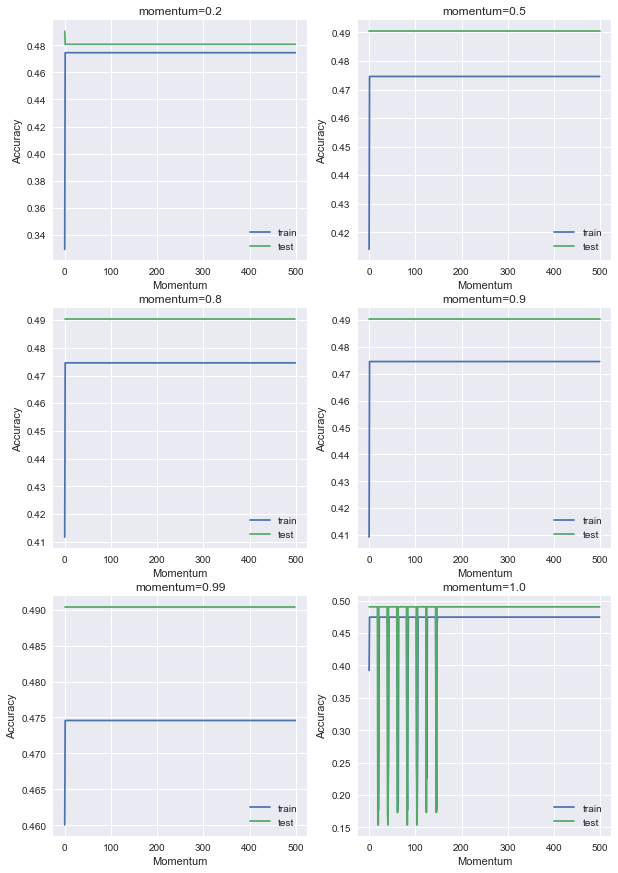

In [45]:
momentums = [0.2, 0.5, 0.8, 0.9, 0.99, 1.0]

plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()

In [56]:
# fit a model and plot learning curve
def fit_model_with_momentum(X_train, y_train, X_test, y_test, momentum):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    opt = SGD(lr=0.001, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0, batch_size=4)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.xlabel('Momentum')
    plt.ylabel('Accuracy')
    plt.legend()

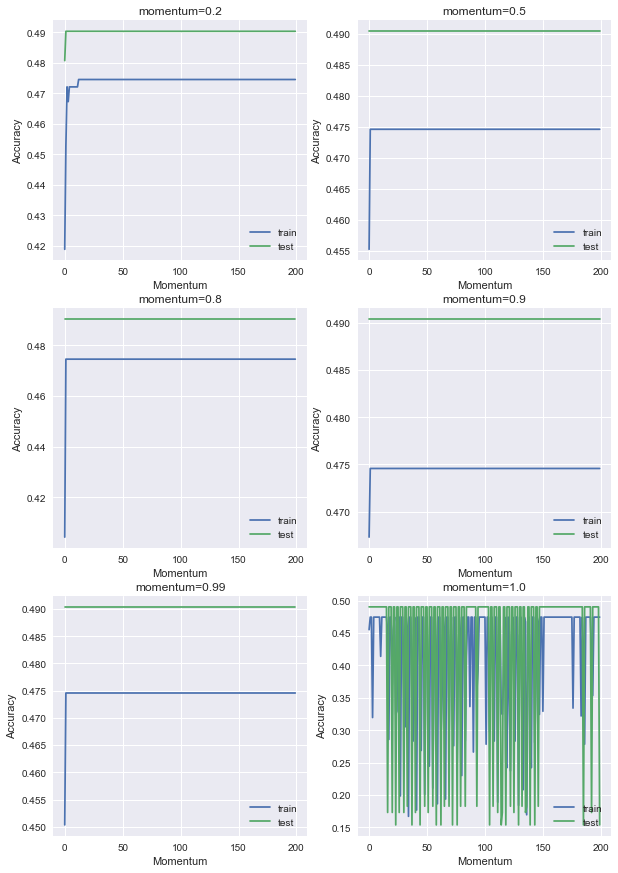

In [57]:
momentums = [0.2, 0.5, 0.8, 0.9, 0.99, 1.0]

plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()

In [40]:
# fit a model and plot learning curve
def fit_model_with_momentum(X_train, y_train, X_test, y_test, momentum):
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    # compile model
    opt = SGD(lr=0.001, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    #model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
    
    # fit model (batch size = 4)
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, verbose=0, batch_size=4)
    
    # plot learning curves
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='test')
    plt.title('momentum='+str(momentum))
    plt.xlabel('Momentum')
    plt.ylabel('Accuracy')
    plt.legend()

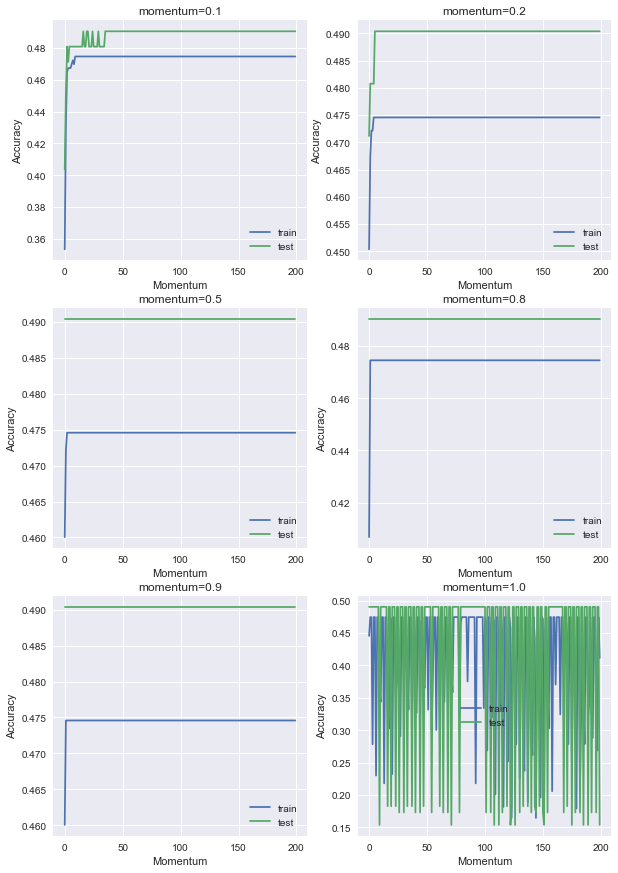

In [41]:
momentums = [0.1, 0.2, 0.5, 0.8, 0.9, 1.0]

plt.figure(figsize=(10, 15))
for i in range(len(momentums)):
    
    # determine the plot number
    plot_no = 320 + (i+1)
    plt.subplot(plot_no)
    
    # fit model and plot learning curves for a learning rate
    fit_model_with_momentum(X_train, y_train, X_test, y_test, momentums[i])

# show learning curves
plt.show()

Hasil eksperimen Momentum: Proses belajar baru mulai pada momentum 1.0

# 6. Kesimpulan berdasarkan Eksperimen Hyperparameter Tuning

- Batch size terbaik adalah batch size < 32, batch size yang besar menghasilkan performansi yang buruk karena dataset yang tersedia hanya 517 baris.
- Epochs optimal dalam eksperimen adalah 200 - 500
- Learning Rate terbaik adalah 0.001 
- Momentum tidak terlalu berpengaruh terhadap performa model
- Optimizer terbaik adalah menggunakan Adaptive Optimizer adam
- Arsitektur layer yang baik adalah model yang mempunyai lebih dari dua hidden layers

# 7. Experiment early stopping & model checkpoint

In [37]:
def init_model():
    # define model
    model = Sequential()
    model.add(Dense(9, input_dim=27, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# init model
model = init_model()


Epoch 00001: val_accuracy improved from -inf to 0.18269, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.18269 to 0.36538, saving model to best_model.h5

Epoch 00003: val_accuracy did not improve from 0.36538

Epoch 00004: val_accuracy did not improve from 0.36538

Epoch 00005: val_accuracy did not improve from 0.36538

Epoch 00006: val_accuracy improved from 0.36538 to 0.39423, saving model to best_model.h5

Epoch 00007: val_accuracy did not improve from 0.39423

Epoch 00008: val_accuracy did not improve from 0.39423

Epoch 00009: val_accuracy did not improve from 0.39423

Epoch 00010: val_accuracy did not improve from 0.39423

Epoch 00011: val_accuracy did not improve from 0.39423

Epoch 00012: val_accuracy did not improve from 0.39423

Epoch 00013: val_accuracy did not improve from 0.39423

Epoch 00014: val_accuracy did not improve from 0.39423

Epoch 00015: val_accuracy did not improve from 0.39423

Epoch 00016: val_accuracy did not improve from 0.39423

E

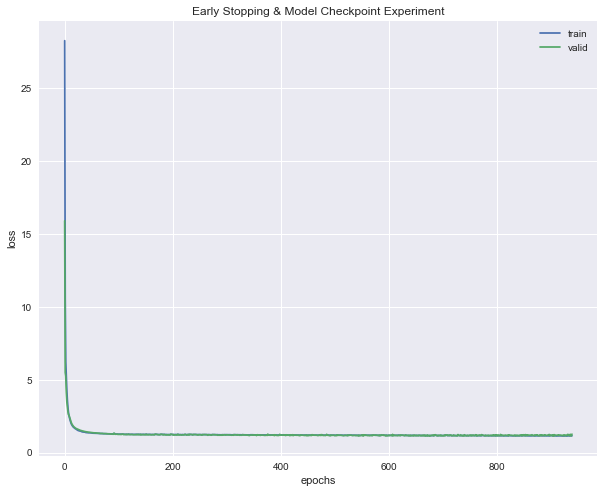

In [38]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=200)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=4000, verbose=0, callbacks=[es, mc])

# plot training history
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Early Stopping & Model Checkpoint Experiment')
plt.show()

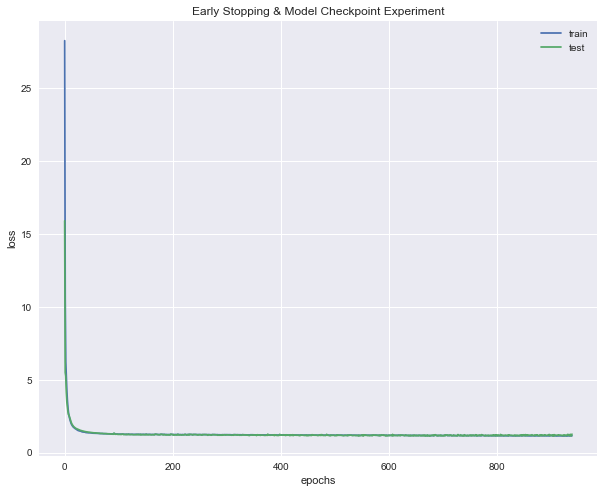

In [42]:
# plot training history
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Early Stopping & Model Checkpoint Experiment')
plt.show()